In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams.update({'font.size': 15})
import pandas as pd
%config InlineBackend.close_figures=False # keep figures open in pyplot

# Plotting the function
$$ f=\frac{x}{\sin x} $$

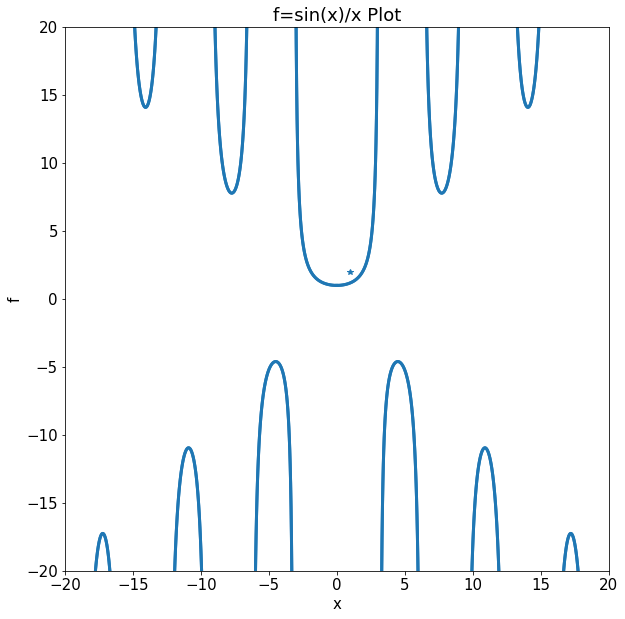

In [10]:
def load(x): return x/math.sin(x)


f = np.vectorize(load)
a = 10
for i in np.arange(-a, a+1):
    x = np.linspace(i*math.pi+0.00000001, i*math.pi+math.pi-0.00000001, 100)
    y = f(x)
    plt.plot(x, y, 'tab:blue', linewidth=3)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.title('f=sin(x)/x Plot')
plt.xlabel('x')
plt.ylabel('f')
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

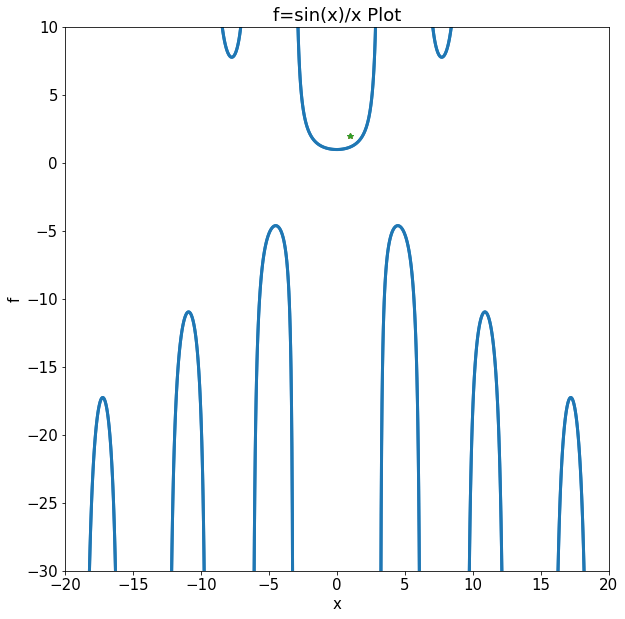

In [12]:
plt.plot(1,2,'*')
plt.xlim(-20, 20)
plt.ylim(-30, 10)
plt.show()